# Project 1 
 Group F: Chung-Pang Hsu and Yan Liu

## Introduction

In this project, we will analyze a dataset about used motorcycles to predict a value of selling_price for a new motorcycle by finding a constant or simple linear regression.
To quantify the quality of the prediction with Root Mean Square Error (RMSE), we will use two numerical methods to find the preditions that minimizes the RMSE.
1. Grid search 
2. Gradient descent
This dataset contains information about used motorcycles. The original data can be found on kaggle [here](https://www.kaggle.com/nehalbirla/motorcycle-dataset?select=BIKE+DETAILS.csv). 

The required packages `numpy`, `pandas`, `matplotlib` , `scipy`, `statsmodels.api`, `openpyxl`, `xlrd`.

## EDA

Import the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in the data set 

In [2]:
bike= pd.read_csv("bikeDetails.csv",sep=',')
bike

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


check and adjust the data type in bike

In [3]:
bike.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [4]:
bike_1=bike.astype({'seller_type':'category', 'owner':'category'})
bike_1.dtypes

name                   object
selling_price           int64
year                    int64
seller_type          category
owner                category
km_driven               int64
ex_showroom_price     float64
dtype: object

In the bike dataset, 924 motorcycles have only one owner, 123 have two, 11 have three and 3 have four.

In [5]:
bike_1.owner.value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

The two-way table shows that most motorcycles were sold by individuals despite the ownership.

In [6]:
pd.crosstab(bike_1.owner, bike_1.seller_type)

seller_type,Dealer,Individual
owner,,
1st owner,4,920
2nd owner,2,121
3rd owner,0,11
4th owner,0,3


Compare selling_price among the owners

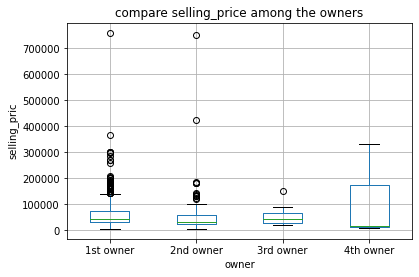

In [7]:
plt.close()
bike_1.boxplot(column=['selling_price'],by=['owner'])
plt.xlabel("owner")
plt.ylabel("selling_pric")
plt.title("compare selling_price among the owners")
plt.suptitle('')
plt.show()

check the correlation between all the variables

In [8]:
bike.corr()

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


count the number of missing values in ex_showrrom_price.

In [9]:
bike['ex_showroom_price'].isnull().sum()

435

Create a histogram of selling price

<AxesSubplot:ylabel='Frequency'>

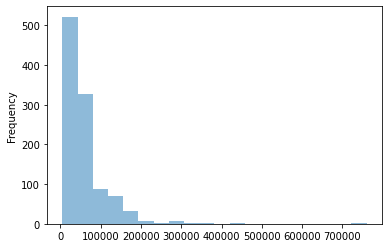

In [10]:
bike['selling_price'].plot.hist(bins=20,alpha=0.5)

Create a density plot of selling price

<AxesSubplot:ylabel='Density'>

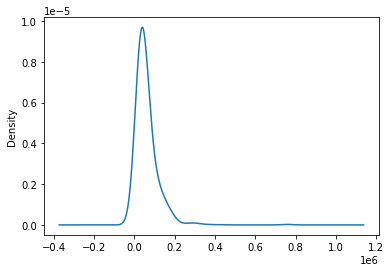

In [11]:
bike['selling_price'].plot.density(bw_method=0.5)

Describe the distribution of selling price

In [12]:
bike['selling_price'].describe(percentiles = [0.05, 0.95])

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
5%        15000.000000
50%       45000.000000
95%      150000.000000
max      760000.000000
Name: selling_price, dtype: float64

Fit a simple linear regression as a reference for later analysis.
Find the theoretical optimal value of intercept (b0) and slope (b1) by simple linear regression in later prediction. 

In [13]:
import scipy.stats as stats
slope, intercept, *_ = stats.linregress(bike['km_driven'],bike['selling_price'])
print(intercept, slope)

67618.07212024048 -0.2322456088674644


Create a scatterplot to check the relationship between selling price and driven km. Add a fitted regression line to the plot.

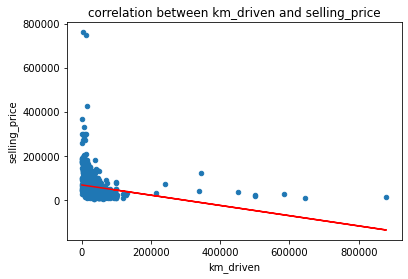

In [14]:
yhat = intercept + slope * bike['km_driven']
plt.close()
bike.plot.scatter(x='km_driven',y='selling_price')
plt.plot(bike['km_driven'], yhat, c = "Red", label = "SLR fit")
plt.title("correlation between km_driven and selling_price")
plt.show()

## Prediction of selling_price
We will try to predict a value of selling_price for a new motorcycle by using two methods (finding the optimal value of c and using a simple linear regression model), each done with two algorithms (Grid Search Algorithm and Gradient Descent Algorithm).
### Grid Search Algorithm
#### A grid search to find the optimal value of c

We are going to implement a grid search to find the optimal value of c based off of our data set.

Create a grid of values for c. Use your EDA to determine reasonable values to consider for c. To aviod the long runing time, we only searched 5% of selling_price 15000.000000 and 95% of selling_price 150000.000000 as reported in EDA part above.

In [15]:
c1=[x*100 for x in range(150,1500)]

Create a root mean squared error (objective) function from a list (y) and a constant (c)

In [16]:
def find_RMSE(y,c):
    return np.sqrt(sum((x-c)**2 for x in y)/len(y)) 

Create a function to find the minimum and return its loction in the list.

In [17]:
def find_min(x):
    start=float("inf")
    j=0
    for i in range(0, len(x)):
        if x[i]<start:
            start=x[i]        
            j=i
    return j     

Loop over the grid of c values, finding the c with the optimal (smallest) RMSE

In [18]:
c1[find_min([find_RMSE(bike['selling_price'],R) for R in c1])]

59600

59600 is very close to the sample mean of selling_price 59638

In [19]:
bike['km_driven'].describe(percentiles = [0.05, 0.95])

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
5%         3500.000000
50%       25000.000000
95%       80000.000000
max      880000.000000
Name: km_driven, dtype: float64

Run it using the km_driven variable as the response

In [20]:
c1[find_min([find_RMSE(bike['km_driven'],R) for R in c1])]

34400

34400 is very close to the sample mean of km_driven  34359

### Using y and another numeric variable x

Create a grid of possible b0 and b1 based on the scatter plot between selling price and driven km. estimate b0 is within (50000,100000), b1 is within (-1,0).

In [21]:
import itertools
b0=[x for x in range(50000,100000,1000)]
b1=[x*0.001 for x in range(-1000,0,5)]
c2 = list(itertools.product(b0, b1))
c2[1]

(50000, -0.995)

In [22]:
len(c2)

10000

Define a new find_RMSE function for list instead of a constant value.
Define a function to get the RMSE of all the pairs of values for b0 and b1 using km_driven as your x variable and selling_price as your y variable.

In [23]:
def find_RMSE_2(y,y_predticted):
    return np.sqrt(sum((y[i]-y_predticted[i])**2 for i in range(0, len(y)))/len(y))

def find_beta(b):
    y_predticted=b[0]+b[1]*bike['km_driven']                
    return find_RMSE_2(bike['selling_price'], y_predticted)

The “best” combination of b0=68000 and b1=-0.235 has the optimal (smallest) RMSE
They are very close to the fitted coeffiecents in the simple linear regression (67620,-0.2322). 

In [24]:
c2[find_min([find_beta(c2[i]) for i in range(0, len(c2))])]

(68000, -0.23500000000000001)

predict the selling_price for km_driven of 10000, 25000, and 35000.

In [25]:
yhat_10000=68000-0.235*10000
yhat_10000

65650.0

In [26]:
yhat_25000=68000-0.235*25000
yhat_25000

62125.0

In [27]:
yhat_35000=68000-0.235*35000
yhat_35000

59775.0

### Gradient Descent Algorithm

In [28]:
file=pd.read_csv("bikeDetails.csv")

Create a series of functions

In [29]:
#The functions 

#The function to create grid of c by dividing 2000 data points
def grid(s,t):
    u=(t-s)/2000
    c_g=[s+u*x for x in range(2000)]
    return c_g

#The loss function array for c. The num arg is for c 
def lf_c(y_c,num):
    y_c=y_c-num
    return np.multiply(y_c,y_c)

#The loss fuction array for b1 and b0
def lf_b0b1(b0,b1):
    y_b0b1=np.array(file['selling_price'])
    x_b0b1=np.array(file['km_driven'])
    l=y_b0b1-b1*x_b0b1-b0
    return np.multiply(l,l)

#The RMSE function. The num arg is for c 
def rmse(y_c,num):
    return (np.sum((lf_c(y_c,num)))/len(lf_c(y_c,num)))**0.5

#The RMSE function for b0 and b1 arg
def rmse_b0b1(b0,b1):
    return ((lf_b0b1(b0,b1)).sum()/len(lf_b0b1(b0,b1)))**0.5

#The derivative function for b0 and b1 arg
def diff(y_c,v,st):
    return (rmse(y_c,v+st)-rmse(y_c,v))/st

#The b0 derivative function for b0 and b1 arg and small step (arg st)
def diff_b0(b0,b1,st):
    return (rmse_b0b1(b0+st,b1)-rmse_b0b1(b0,b1))/st

#The b1 derivative function for b0 and b1 arg and small step (arg st)
def diff_b1(b0,b1,st):
    return (rmse_b0b1(b0,b1+st)-rmse_b0b1(b0,b1))/st

#The distance function for 
def distance_b0b1(b0,b1,stb0,stb1):
    new_b0=b0-diff_b0(b0,b1,stb0)*stb0
    new_b1=b1-diff_b1(new_b0,b1,stb1)*stb1
    return ((new_b0-b0)**2+(new_b1-b1)**2)**0.5

#The function to predict sell price
def y(x,b0,b1):
    return b1*x+b0

Grid search to find the optimal value of c

In [30]:
#Setup the parameters
step_c=10**-5 #Small c step
num_tol=10**-10 #Small tolerance
coarse_num=7 #Number of coarse search

for i in range(coarse_num):
    # At last final fine search
    if (i==coarse_num-1):
        c_g=grid(rn[0],rn[1])
        print("Fine search C between ",rn[0]," and ",rn[1]," at loop number ",i+1)
    # At coarse fine search    
    elif (i):
        c_g=grid(rn[0],rn[1])
        print("Coarse search C between ",rn[0]," and ",rn[1]," at loop number ",i+1)
    # At initial coarse fine search     
    else:
        c_g=grid(int(file['selling_price'].min()),int(file['selling_price'].max()))
        print("Coarse search C between ",int(file['selling_price'].min())," and ",int(file['selling_price'].max())," at loop number ",i+1)
    #Initial search range start and stop points
    rn=[]
    if i<coarse_num-1:
        #coarse find range by Gradient Descent Algorithm by 1/10 range. It is much faster than the searching point by point 
        for j in range(10):
        #Determine if optimized c is within the range by slope changing by negative to positive
            if (diff(np.array(file['selling_price']),c_g[200*j],step_c)<0 and diff(np.array(file['selling_price']),c_g[200*j+199],step_c)>=0):
                rn.append(c_g[200*j])
                rn.append(c_g[200*j+199])
                break
    else:
        #Fine find range by Gradient Descent Algorithm each point of 2000 points 
        for lp in range(2000):
            if diff(np.array(file['selling_price']),c_g[lp],step_c)<0:
                #Determine if abs(new_c - cur_c) < num_tol is  met or not
                if (lp) and (abs(step_c*diff(np.array(file['selling_price']),c_g[lp],step_c))<num_tol):
                    final_c=c_g[lp]            
                    break
print("The predicted C is", final_c)        

Coarse search C between  5000  and  760000  at loop number  1
Coarse search C between  5000.0  and  80122.5  at loop number  2
Coarse search C between  57585.75  and  65060.43875  at loop number  3
Coarse search C between  59080.68775  and  59824.419280625  at loop number  4
Coarse search C between  59601.2998214375  and  59675.30110873469  at loop number  5
Coarse search C between  59630.900336356375  and  59638.26346444245  at loop number  6
Fine search C between  59637.52715163384  and  59638.259782878406  at loop number  7
The predicted C is 59637.555357936755


In [31]:
#Setup the parameters
step_c=10**-5 #Small c step
num_tol=10**-10 #Small tolerance
coarse_num=7 #Number of coarse search

for i in range(coarse_num):
    # At last final fine search
    if (i==coarse_num-1):
        c_g=grid(rn[0],rn[1])
        print("Fine search X between ",rn[0]," and ",rn[1]," at loop number ",i+1)
    # At coarse fine search    
    elif (i):
        c_g=grid(rn[0],rn[1])
        print("Coarse search X between ",rn[0]," and ",rn[1]," at loop number ",i+1)
    # At initial coarse fine search     
    else:
        c_g=grid(int(file['km_driven'].min()),int(file['km_driven'].max()))
        print("Coarse search X between ",int(file['km_driven'].min())," and ",int(file['km_driven'].max())," at loop number ",i+1)
    #Initial search range start and stop points
    rn=[]
    if i<coarse_num-1:
        #coarse find range by Gradient Descent Algorithm by 1/10 range. It is much faster than the searching point by point 
        for j in range(10):
        #Determine if optimized c is within the range by slope changing by negative to positive
            if (diff(np.array(file['km_driven']),c_g[200*j],step_c)<0 and diff(np.array(file['km_driven']),c_g[200*j+199],step_c)>=0):
                rn.append(c_g[200*j])
                rn.append(c_g[200*j+199])
                break
    else:
        #Fine find range by Gradient Descent Algorithm each point of 2000 points 
        for lp in range(2000):
            if diff(np.array(file['km_driven']),c_g[lp],step_c)<0:
                #Determine if abs(new_c - cur_c) < num_tol is  met or not
                if (lp) and (abs(step_c*diff(np.array(file['km_driven']),c_g[lp],step_c))<num_tol):
                    final_c=c_g[lp]            
                    break
print("The predicted X is", final_c)   

Coarse search X between  350  and  880000  at loop number  1
Coarse search X between  350.0  and  87875.175  at loop number  2
Coarse search X between  26607.5525  and  35316.3074125  at loop number  3
Coarse search X between  33574.55643  and  34441.07754379375  at loop number  4
Coarse search X between  34354.42543241437  and  34440.64428323685  at loop number  5
Coarse search X between  34354.42543241437  and  34363.00420807121  at loop number  6
Fine search X between  34359.57269780847  and  34360.42628598633  at loop number  7
The predicted X is 34359.57312460256


Implement the gradient descent idea to find the optimal value of b0 and b1

In [32]:
#Setup the parameters
step_b0=10**-4 #Small b0 step
step_b1=10**-4 #Small b1 step
b0b1_coarse_num=4  #Number of coarse search
num_tol_dis=0.01 #Distance tolerance

for i in range(b0b1_coarse_num):
    if (i):
        b0_g=grid(rn_b0[0],rn_b0[1])
        b1_g=grid(rn_b1[0],rn_b1[1]) 
    else:
        #Initial search range
        b0_g=grid(40000,100000)
        b1_g=grid(-3,3)  
    #Initial search range of b0 and b1
    rn_b0=[]
    rn_b1=[]
    if  i<b0b1_coarse_num-1:
    #coarse find range by Gradient Descent Algorithm by 1/10 range. It is much faster than the searching point by point 
        for j in range(10):
            print("Search b0 between ",[b0_g[200*j],b0_g[200*j+199]],"and b1 betweem ",[b1_g[200*j],b1_g[200*j+199]]," at loop number ",i+1)
            #Determining if optimized b0 and b1 is within the range by delta of distance become negative 
            if ((distance_b0b1(b0_g[200*j+198],b1_g[200*j+198],step_b0,step_b1)-distance_b0b1(b0_g[200*j+199],b1_g[200*j+199],step_b0,step_b1))<0):
                rn_b0.append(b0_g[200*j])
                rn_b0.append(b0_g[200*j+199])
                rn_b1.append(b1_g[200*j])
                rn_b1.append(b1_g[200*j+199])
                print("Coarse search b0 between ",rn_b0,"and b1 betweem ",rn_b1," at loop number ",i+1)
                break                        
    else:
        #Fine find range by Gradient Descent Algorithm each point of 2000 points
        print("Fine search b0 between ",[b0_g[0],b0_g[1999]],"and b1 betweem ",[b1_g[0],b1_g[1999]]," at loop number ",i+1)
        for lp in range(2000):           
            new_b0=b0_g[lp]-diff_b0(b0_g[lp],b1_g[lp],step_b0)*step_b0 
            if (diff_b0(b0_g[lp],b1_g[lp],step_b0)<0 and diff_b1(new_b0,b1_g[lp],step_b1))<0:   
                #Determine if if the distance between the cur_b0, cur_b1 vector to the new_b0, new_b1 vector is less than small tolerance
                if ((i) and (distance_b0b1(b0_g[lp],b1_g[lp],step_b0,step_b1)<num_tol_dis)):
                    final_b0=b0_g[lp-1]-diff_b0(b0_g[lp-1],b1_g[lp-1],step_b0)*step_b0
                    final_b1=b1_g[lp-1]-diff_b1(final_b0,b1_g[lp-1],step_b1)*step_b1
                    break              
print("The predicted B0 is", final_b0)  
print("The predicted B1 is", final_b1)   

Search b0 between  [40000.0, 45970.0] and b1 betweem  [-3.0, -2.403]  at loop number  1
Search b0 between  [46000.0, 51970.0] and b1 betweem  [-2.4, -1.803]  at loop number  1
Search b0 between  [52000.0, 57970.0] and b1 betweem  [-1.8, -1.203]  at loop number  1
Search b0 between  [58000.0, 63970.0] and b1 betweem  [-1.2, -0.6029999999999998]  at loop number  1
Search b0 between  [64000.0, 69970.0] and b1 betweem  [-0.6000000000000001, -0.0030000000000001137]  at loop number  1
Coarse search b0 between  [64000.0, 69970.0] and b1 betweem  [-0.6000000000000001, -0.0030000000000001137]  at loop number  1
Search b0 between  [64000.0, 64594.015] and b1 betweem  [-0.6000000000000001, -0.5405985000000001]  at loop number  2
Search b0 between  [64597.0, 65191.015] and b1 betweem  [-0.5403000000000001, -0.4808985000000001]  at loop number  2
Search b0 between  [65194.0, 65788.015] and b1 betweem  [-0.4806000000000001, -0.4211985000000001]  at loop number  2
Search b0 between  [65791.0, 66385.0

predict the selling_price for km_driven of 10000, 25000, and 35000.

In [33]:
print("Predict selling_price for km_driven of 10000, 25000, and 35000 are respectively:"+str(y(10000,final_b0,final_b1))+", "+str(y(25000,final_b0,final_b1))+" and "+str(y(35000,final_b0,final_b1)))

Predict selling_price for km_driven of 10000, 25000, and 35000 are respectively:65418.2856698202, 62057.14788797197 and 59816.38936673982
